In [70]:
import pandas as pd
import matplotlib as plt

plt.style.use('seaborn-v0_8-white')
print(plt.style.available)
df = pd.read_csv('netflix_users.csv')



['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Data cleaning

In [71]:
df.drop_duplicates(inplace = True)
df.dropna(inplace=True)


Add age groups

In [72]:
def age_group(age):
    group = ''
    if age <= 25:
        group = '18 - 25'
    elif age <= 35:
        group = '26 - 35'
    elif age <= 45:
        group = '36 - 45'
    elif age <= 55:
        group = '46 - 55'
    elif age <= 65:
        group = '56 - 65'
    else:
        group = '66 and more'                    
    return group


df['Age_group'] = df['Age'].apply(age_group)



<Axes: xlabel='Age group', ylabel='User count'>

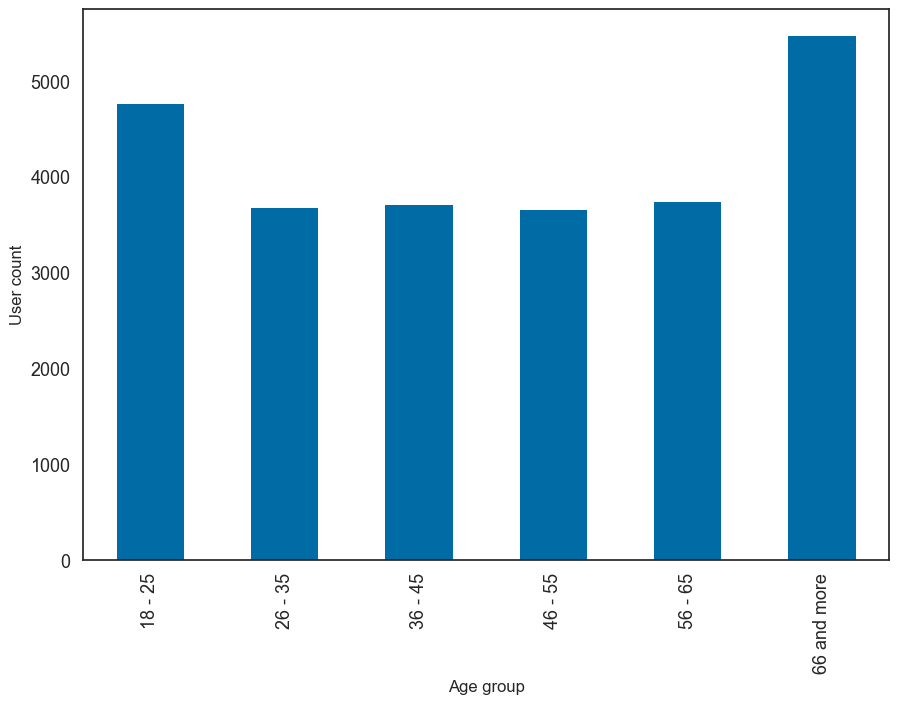

In [73]:

# display(df.head())
# df.groupby(['Age_group','Subscription_Type']).count()[['User_ID']].plot(kind='bar')
df.groupby(['Age_group']).count()[['User_ID']].plot(kind='bar',
                                                    ylabel='User count',
                                                    xlabel='Age group',
                                                    legend=False )
#.plot(kind='bar')#.groupby(['Subscription_type']).count().to_csv('test')
# print(df)


In [5]:
df.groupby(['Subscription_Type']).value_counts()
# .value_counts().plot(
#     kind='pie'
# )

Subscription_Type  User_ID  Name              Age   Country  Watch_Time_Hours  Favorite_Genre  Last_Login  Age_group  
Basic              3        Emma Davis        60.0  UK       35.89             Comedy          1/24/2025   56 - 65        1
                   9        James Williams    39.0  UK       950.14            Action          4/16/2024   36 - 45        1
                   23       Sarah Davis       40.0  UK       451.59            Drama           4/8/2024    36 - 45        1
                   24       John Smith        46.0  UK       388.91            Horror          10/16/2024  46 - 55        1
                   25       Alex Brown        37.0  Canada   418.20            Horror          5/26/2024   36 - 45        1
                                                                                                                         ..
Standard           24980    Jane Davis        65.0  Mexico   529.50            Romance         3/12/2024   56 - 65        1
             

<Axes: title={'center': 'Average watch time'}, xlabel='Age group', ylabel='hours'>

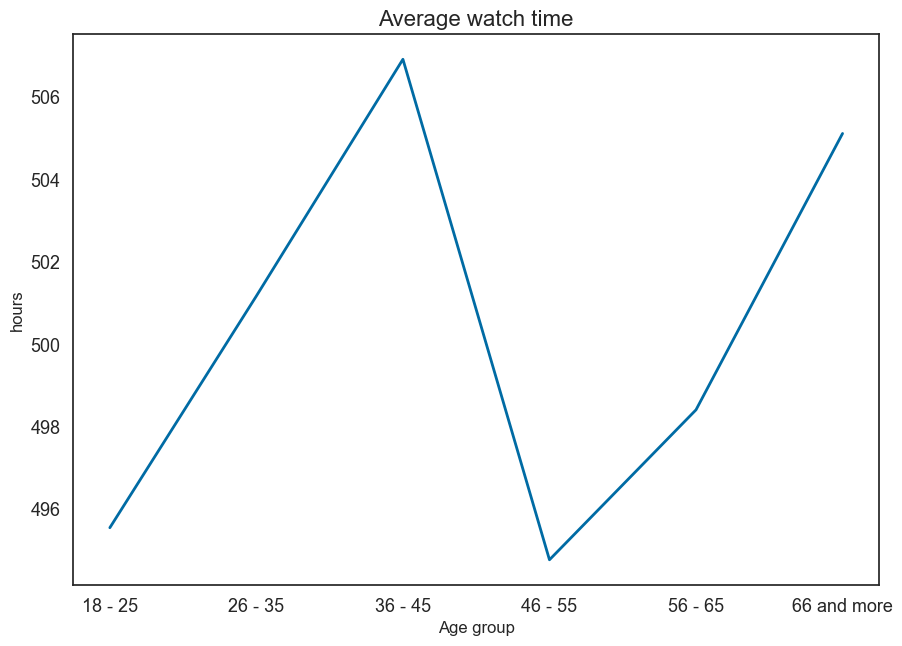

In [87]:
# df.plot(kind='line')
df.groupby(['Age_group']).agg({'Watch_Time_Hours': 'mean'}).plot(kind='line',
                                                                 xlabel='Age group',
                                                                 ylabel='hours',
                                                                 legend=False,
                                                                 title='Average watch time'
                                                                 )

<Axes: >

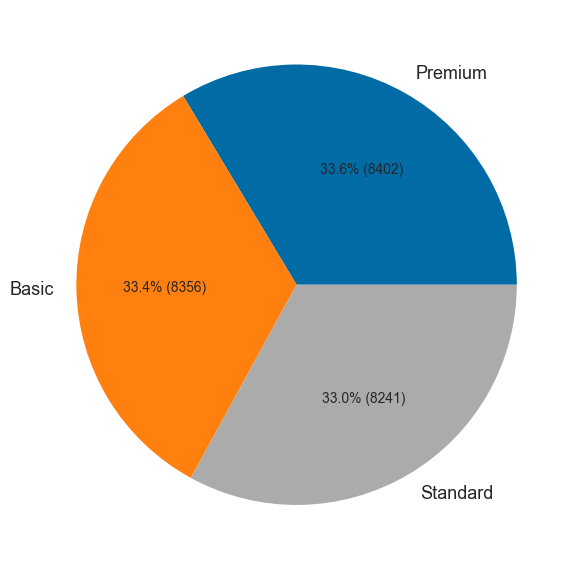

In [85]:
# df[['Age','Watch_Time_Hours']].plot(kind='scatter',x='Age', y='Watch_Time_Hours')

df.value_counts('Subscription_Type').plot(kind='pie',
                                          ylabel='',
                                          autopct =lambda p: f'{p:.1f}% ({int(p * sum(df.value_counts('Subscription_Type'))/100)})')